# Baseline model

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import random

from keras.preprocessing import image

In [10]:
data_path = os.path.join(os.getcwd(), '.', 'input')
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')
labels = os.path.join(data_path, 'train_labels.csv')

In [11]:
df = pd.read_csv(labels)
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


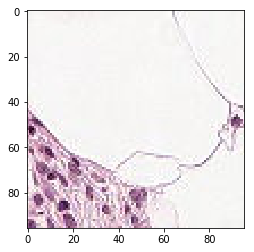

In [20]:
def crop_roi(img, size, roi_size=48):
    roi_ul = (int(size / 2 - roi_size / 2), int(size / 2 - roi_size / 2))
    roi_lr = (int(size / 2 + roi_size / 2), int(size / 2 + roi_size / 2))
    return img[roi_ul[1]: roi_lr[1], roi_ul[0]: roi_lr[0]]

def load_image(img_id, img_size=96, roi_size=None):
    img_path = os.path.join(train_path, '{}.tif'.format(img_id))
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img = image.img_to_array(img)
    if roi_size:
        return crop_roi(img, img_size, roi_size)
    return img

img = load_image(df.id[0])
plt.imshow(img / 255)